In [26]:
import pandas as pd
from tqdm import tqdm
import os
from src.sentiment_analysis import SentimentAnalysis
import time
import seaborn as sns
import matplotlib.pyplot as plt

In [27]:
file_path = "data/sampled_dataset_01percent.jsonl"
file_path_climate = "data/climate_videos.jsonl"

df = pd.read_json(file_path, lines=True)
df_climate = pd.read_json(file_path_climate, lines=True)

df.set_index('display_id', inplace=True)
df_climate.set_index('display_id', inplace=True)

In [28]:
file_name = 'data/sample01_title_sentiment_analysis.csv'
file_name_climate = 'data/video_title_sentiment_analysis.csv'

def save_new_title_sentiments(sentiment_res: pd.DataFrame):
    if not os.path.isfile(file_name):
        sentiment_res.to_csv(file_name)
    else:
        old_data = pd.read_csv(file_name, index_col=0)
        new_data = pd.concat([old_data, sentiment_res])
        new_data.to_csv(file_name)

# Perform sentiment analysis on titles

In [29]:
# sa = SentimentAnalysis()
# sentiment_res = pd.DataFrame(columns=sa.sentiment_names)
# 
# batch_size = 200
# last_iter = 0
# for i in tqdm(range(last_iter * batch_size, len(titles), batch_size), desc='Sentiment Analysis'):
#     batch = titles.iloc[i:i+batch_size]
#     sentiment_res[sa.sentiment_names] = batch.apply(sa.get_scores).apply(pd.Series)
#     save_new_title_sentiments(sentiment_res)
#     sentiment_res = pd.DataFrame(columns=sa.sentiment_names)    

# Create new sentiment results

In [30]:
sa_label_to_int = {'positive':1, 'negative':-1, 'neutral':0}

def load_sentiment_data(file_name):
    sentiment_res = pd.read_csv(file_name, index_col=0)
    sentiment_res['sa_label'] = sentiment_res.apply(lambda row: row.idxmax(), axis=1)
    sentiment_res['sa_label_int'] = sentiment_res['sa_label'].apply(lambda l: sa_label_to_int[l])
    sentiment_res['sa_score'] = sum([sentiment_res[label] * sa_label_to_int[label] for label in SentimentAnalysis.sentiment_names])
    return sentiment_res

sentiment = load_sentiment_data(file_name)
sentiment_climate = load_sentiment_data(file_name_climate)

# Sanity check

In [31]:
for label in SentimentAnalysis.sentiment_names:
    indexes = sentiment[label].sort_values(ascending=False).head(3)
    print(label)
    print(df.loc[indexes.index]['title'])
    print('\n')

positive
display_id
kv5507OKQKs    TYLOR GOLDEN: "I absolutely loved it and I'm s...
j997fnDiWGE                  Exciting Announcement! GOOD NEWS :D
o85LYSMen7o    Thank you Subscribers and Supporters! We love ...
Name: title, dtype: object


neutral
display_id
LNW4_ebs7bQ    Sami Zayn goes in on the WWE universe - Raw 4/...
2fMdGTBzJS8    Hideo Itami hits Austin Aries with the GTS: NX...
E5D9tVf-El4    Samoa Joe goes one-on-one with Kevin Owens thi...
Name: title, dtype: object


negative
display_id
fIhDttkO6Gc    SCREENCAST - Video Recorder for Android - SUCK...
G2Aj6AX1pQg                     It's just the worst ending ever!
A62CsMa1uLg                       I DESTROYED MY DREAM CAR!!! :(
Name: title, dtype: object


In [32]:
sa_names = SentimentAnalysis.sentiment_names

data = pd.concat([df, sentiment], axis=1)
data_climate = pd.concat([df_climate, sentiment_climate], axis=1)
data.reset_index(inplace=True)
data_climate.reset_index(inplace=True)
data

,display_id,categories,channel_id,crawl_date,description,dislike_count,duration,like_count,tags,title,upload_date,view_count,positive,neutral,negative,sa_label,sa_label_int,sa_score
0,HNg8_Zzz5A8,Film & Animation,UCzWrhkg9eK5I8Bm3HfV-unA,2019-10-31 20:19:30.784552,Lego City Police Lego Fireman Firetruck Cartoo...,31.0,1539,114.0,"Lego city police,lego police,lego city,lego fi...",Lego City Police Lego Fireman Firetruck Cartoo...,2016-08-19 00:00:00,167221,0.465457,0.525257,0.009286,neutral,0,0.456171
1,iBZB5iRIam0,Gaming,UCzWrhkg9eK5I8Bm3HfV-unA,2019-10-31 20:18:33.167675,Lego Batman Movie Complete Lego Batman 3 Beyon...,0.0,1349,13.0,"lego batman,lego batman movie,lego movies for ...",Lego Batman Movie Complete Lego Batman Beyond ...,2017-12-13 00:00:00,618,0.265168,0.725068,0.009764,neutral,0,0.255403
2,hg2PBUFKOm0,Gaming,UCzWfqsjlvzAOUozsGFR3kbg,2019-10-31 15:41:51.284693,The best attacking movesets for a dragonite at...,33.0,387,268.0,"pokemon go,pokemongo,pokemon go guide,pokemon ...",THE BEST MOVESETS FOR ATTACKING DRAGONITE :: P...,2016-09-25 00:00:00,17884,0.781337,0.214546,0.004116,positive,1,0.777221
3,g3PBKnHI3wU,Gaming,UCzWfqsjlvzAOUozsGFR3kbg,2019-10-31 15:41:49.462458,FREE DIAMONDS AND GEMS HERE!\nStep by Step Gui...,7.0,133,236.0,"Boom Beach,shock mine,boom beach shock mine,bo...",SHOCK MINE SNEAK PEEK #1 | Boom Beach | NEW UP...,2015-10-18 00:00:00,6936,0.062351,0.916810,0.020839,neutral,0,0.041511
4,xt73H3DOTdw,People & Blogs,UCzWfqsjlvzAOUozsGFR3kbg,2019-10-31 15:42:16.064520,Congratz to MineModerzz for giving the Link an...,1.0,187,43.0,"Contest,Speed,Subscriber,Epic,Knights and drag...",Knights and dragons Super Fast Sub Wins the co...,2014-02-19 00:00:00,1644,0.639771,0.354803,0.005425,positive,1,0.634346
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72597,Xugl29-oWrI,News & Politics,UCrwE8kVqtIUVUzKui2WVpuQ,2019-11-01 23:40:23.331322,हमारे देश में लोगों की सेवा करते-करते 33 हजार ...,1.0,139,20.0,"BJP,Bharatiya Janata Party,Narendra Modi,Amit ...",हमने दिल्ली में शानदार पुलिस मेमोरियल बनाकर खड...,2019-04-26 00:00:00,344,0.031319,0.824362,0.144319,neutral,0,-0.113000
72598,XiufyoFvpSI,News & Politics,UCrwE8kVqtIUVUzKui2WVpuQ,2019-11-01 23:38:36.529667,35 हजार शहीद जवानों का सच्चा सम्मान हमारे पीएम...,0.0,112,51.0,"BJP,Bharatiya Janata Party,Narendra Modi,Amit ...",मोदी जी ने पहले ही सत्र में 370 और 35A को निरस...,2019-09-30 00:00:00,892,0.030509,0.839562,0.129929,neutral,0,-0.099420
72599,1ybxsD_FSC8,News & Politics,UCrwE8kVqtIUVUzKui2WVpuQ,2019-11-01 23:38:45.442106,झारखंड की नई पहचान बनने जा रही है कि ये वो राज...,0.0,196,16.0,"BJP,Bharatiya Janata Party,Narendra Modi,Amit ...",झारखंड की नई पहचान 'गरीब और आदिवासियों के हितो...,2019-09-12 00:00:00,322,0.033411,0.803885,0.162704,neutral,0,-0.129294
72600,A-XkA-FNf2Y,News & Politics,UCrwE8kVqtIUVUzKui2WVpuQ,2019-11-01 23:38:41.144156,Subscribe Now - http://bit.ly/2ofH4S4 Stay Upd...,19.0,1468,550.0,"BJP,Bharatiya Janata Party,Narendra Modi,Amit ...",PM Modi & Russian President Vladimir Putin at ...,2019-09-04 00:00:00,11657,0.049777,0.917450,0.032773,neutral,0,0.017003


# Plot sentiment scores

# PLot the sentiment counts and scores

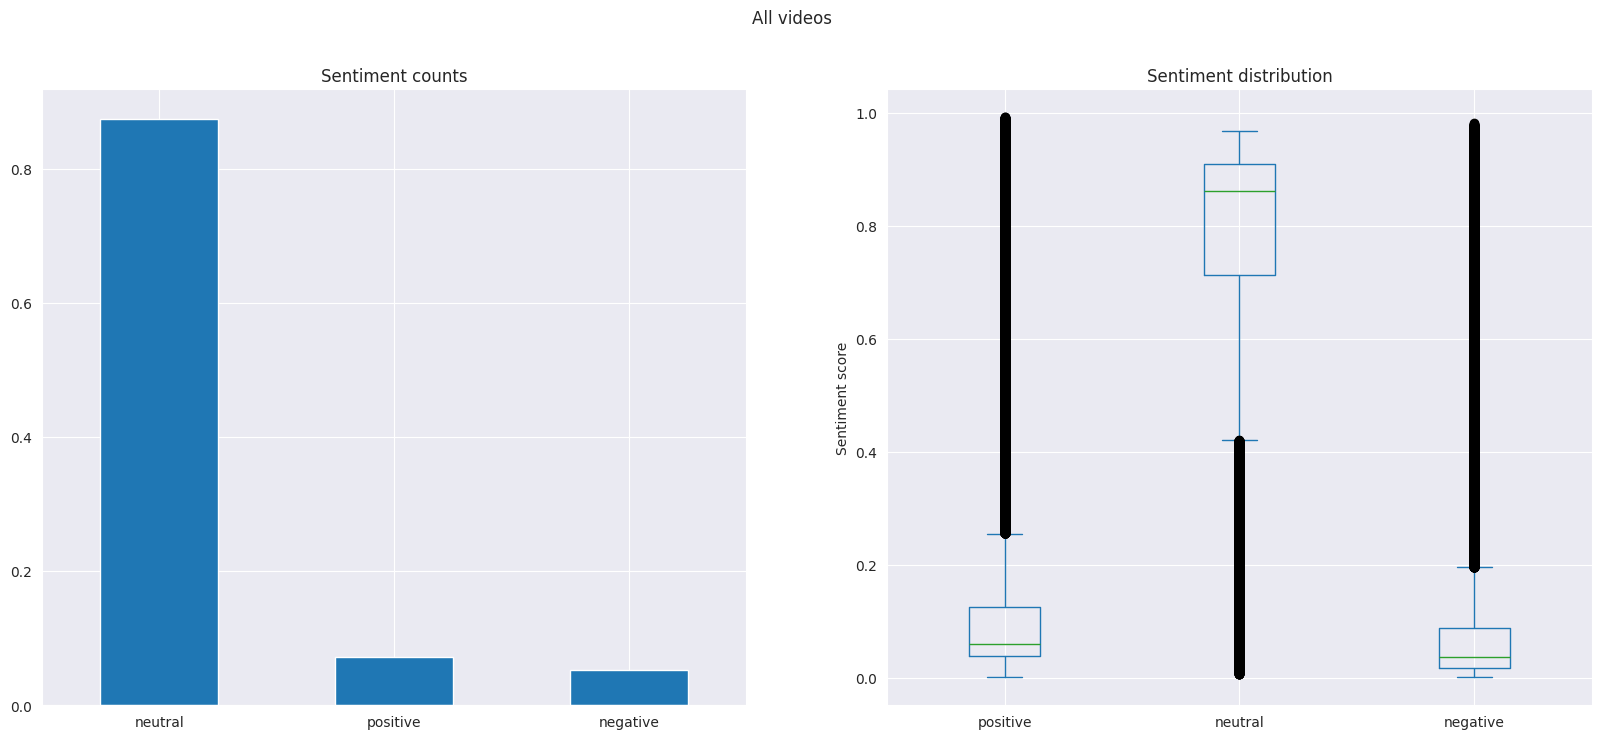

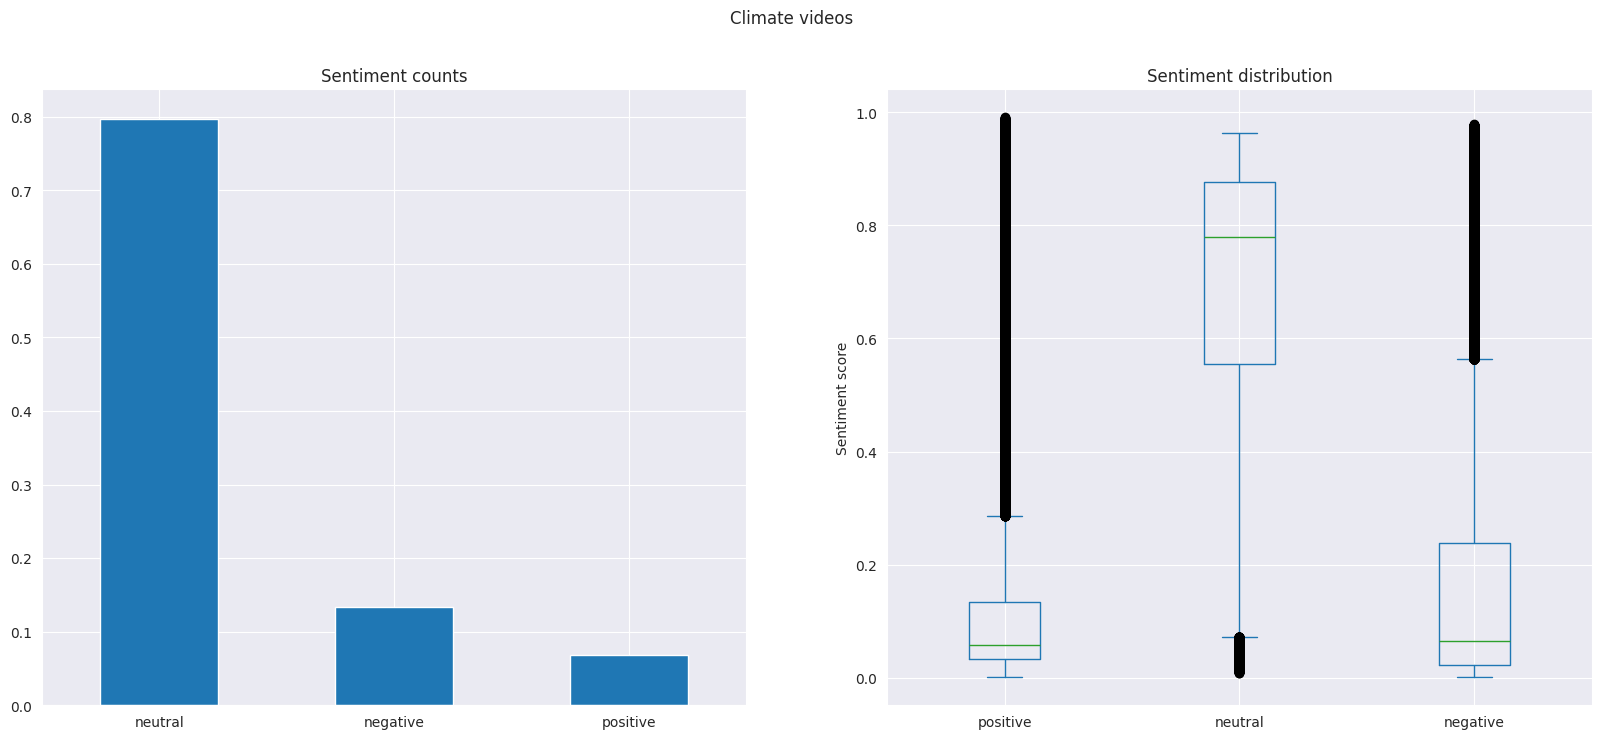

Climate videos seem to be les neutral and more negative then the usual videos


In [33]:
def plot_label_counts(data, label, title):
    fig, ax = plt.subplots(1, 2, figsize=(20, 8))
    fig.suptitle(title)
    data[label].value_counts(normalize=True).plot(kind='bar', ax=ax[0], title='Sentiment counts', rot=0, xlabel="", )
    data[sa_names].plot(kind='box', ax=ax[1], title='Sentiment distribution', rot=0, ylabel="Sentiment score")
    plt.show()


plot_label_counts(data, 'sa_label', 'All videos')
plot_label_counts(data_climate, 'sa_label', 'Climate videos')
print("Climate videos seem to be les neutral and more negative then the usual videos")

# Is there correlations between like, dislikes and sentiment ? => NO

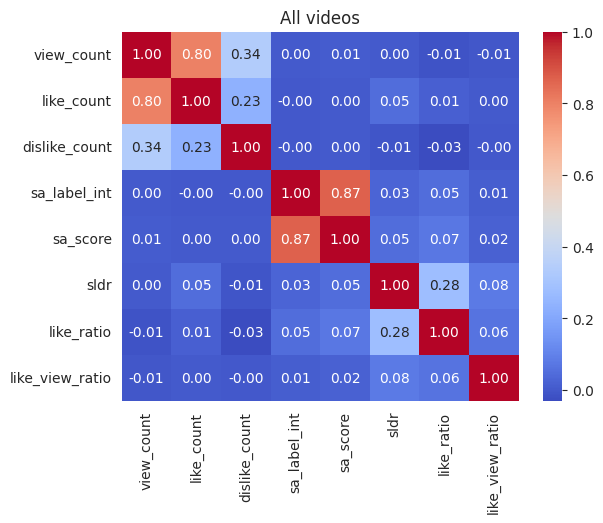

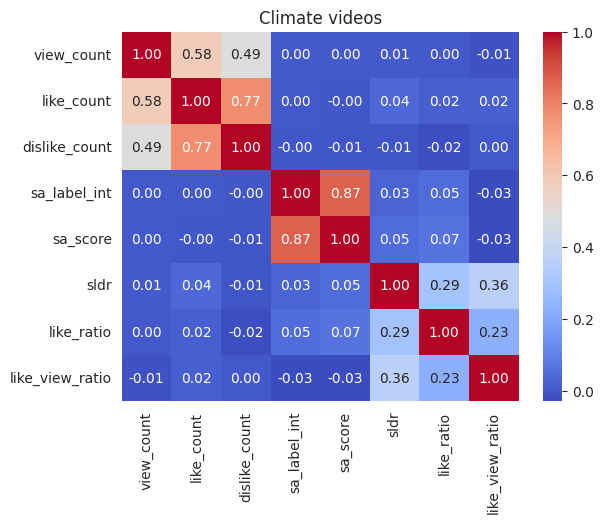

In [39]:
def sldr(like_count, dislike_count):
    if like_count == 0 and dislike_count == 0:
        return None
    if like_count > dislike_count:
        return (like_count+1)/(dislike_count+1)
    else :
        return - (dislike_count+1)/(like_count+1)
    
    
def plot_corr(data, title: str):
    data['sldr'] = data.apply(lambda row: sldr(row['like_count'], row['dislike_count']), axis=1)
    data['like_ratio'] = data['like_count'] / (data['like_count'] + data['dislike_count'])
    data['like_view_ratio'] = data['like_count'] / data['view_count']
    corr_cols = ['view_count', 'like_count', 'dislike_count', 'sa_label_int', 'sa_score', 'sldr', 'like_ratio', 'like_view_ratio']
    corr_mtx = data[corr_cols].corr()
    sns.heatmap(corr_mtx, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title(title)
    plt.show()
    
    
plot_corr(data, 'All videos')
plot_corr(data_climate, 'Climate videos')

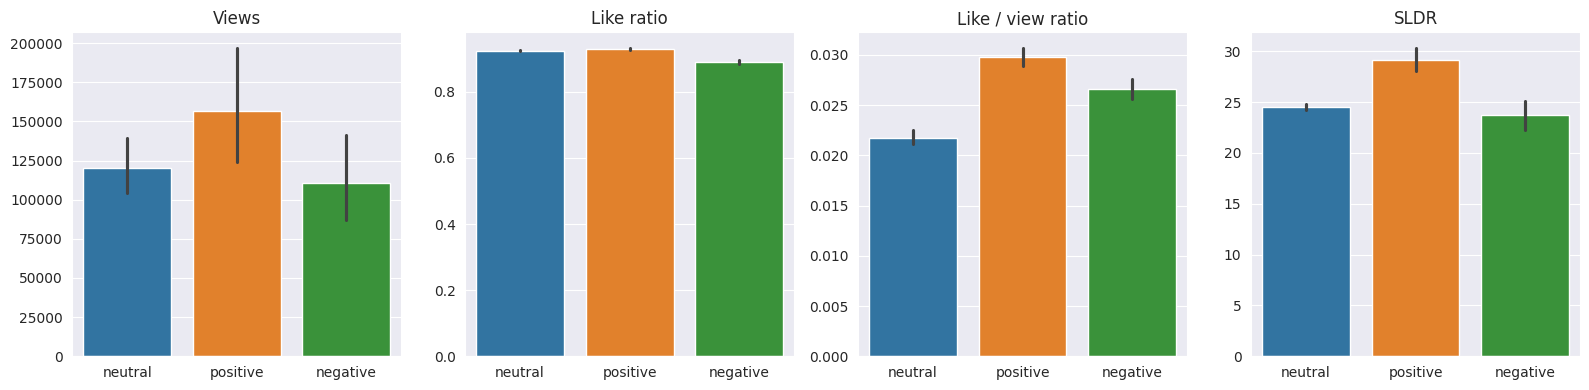

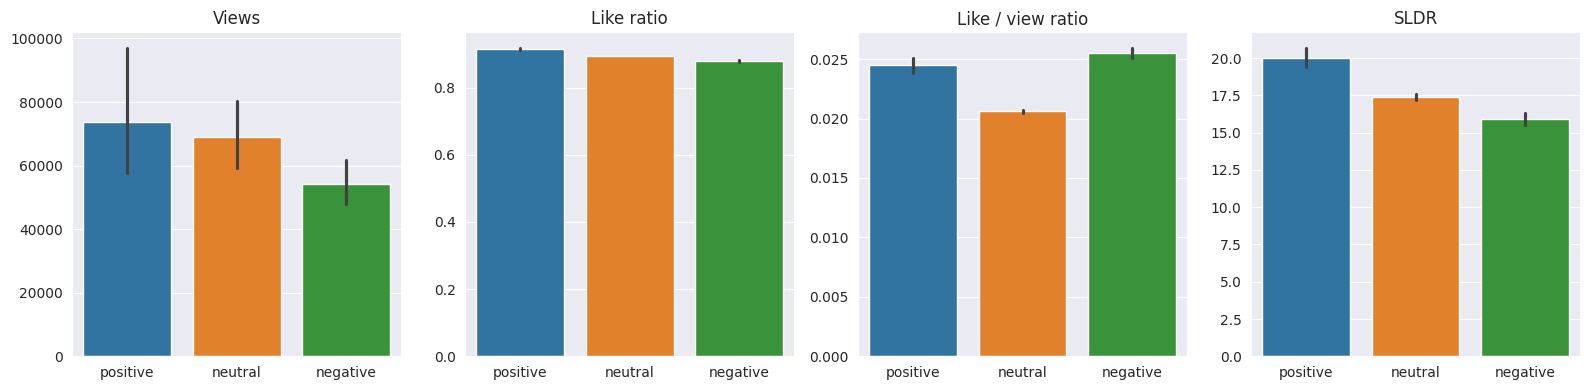

In [56]:
cols = ['view_count', 'like_ratio', 'like_view_ratio', 'sldr']
titles = ['Views', 'Like ratio', 'Like / view ratio', 'SLDR']

def plot_metrics_per_sentiment(data, title):
    fig, ax = plt.subplots(1, 4, figsize=(16, 4))
    for i in range(4):
        sns.barplot(ax=ax[i], x="sa_label", y=cols[i], data=data, hue="sa_label", legend=False)
        ax[i].set_title(titles[i])
        ax[i].set_xlabel("")
        ax[i].set_ylabel("")
    
    plt.tight_layout()
    plt.show()
    
plot_metrics_per_sentiment(data, 'All videos')
plot_metrics_per_sentiment(data_climate, 'Climate videos')

# Does the sentiment change over time ?

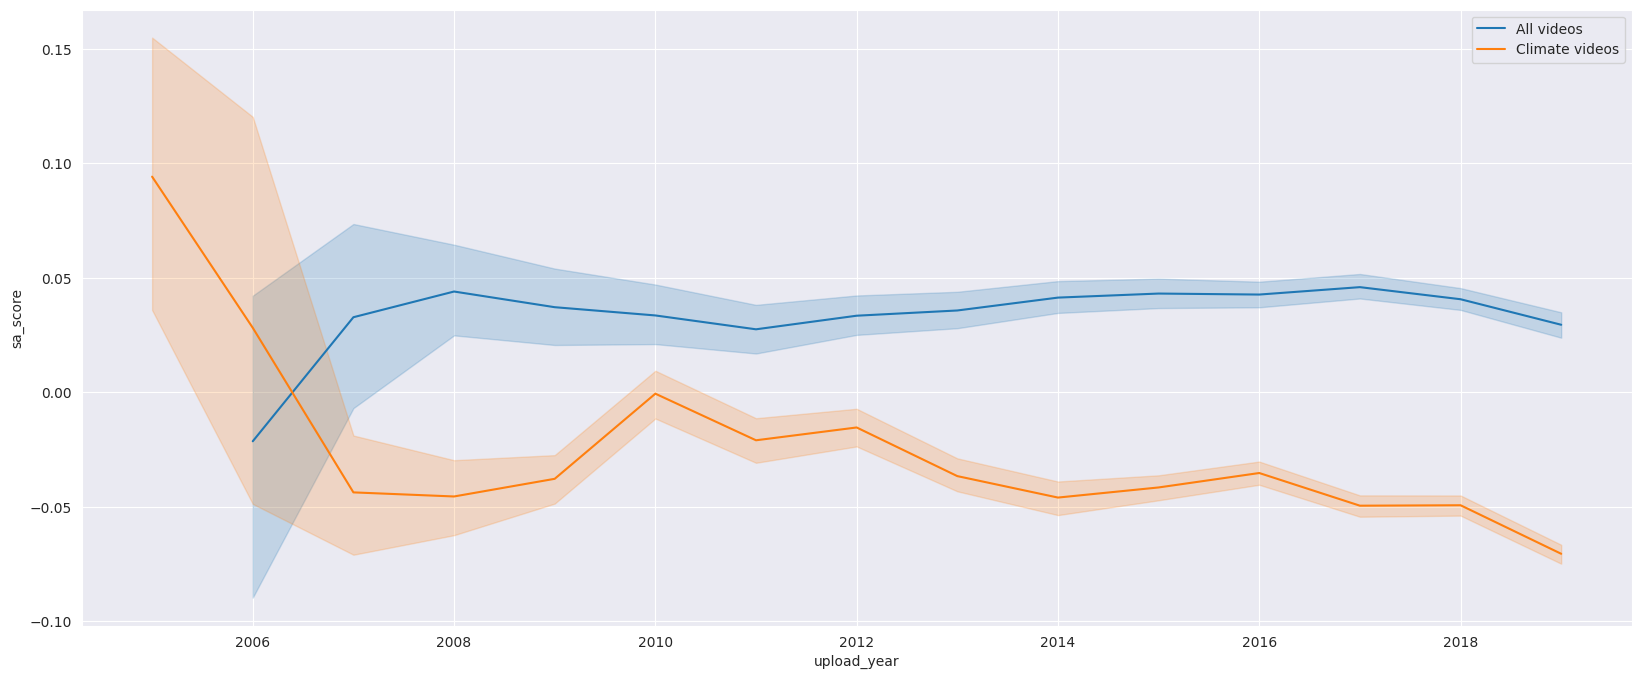

In [55]:
data['upload_date'] = pd.to_datetime(data['upload_date'])
data['upload_year'] = data['upload_date'].dt.year
data_climate['upload_date'] = pd.to_datetime(data_climate['upload_date'])
data_climate['upload_year'] = data_climate['upload_date'].dt.year

def plot_sentiment_evolution(data, label, ax):
    sns.lineplot(x="upload_year", y="sa_score", data=data, ax=ax, label=label)

fig, ax = plt.subplots(figsize=(20, 8))
plot_sentiment_evolution(data, 'All videos', ax)
plot_sentiment_evolution(data_climate, 'Climate videos', ax)
plt.legend()
plt.show()

# Does the sentiment change according to the category ?

/tmp/ipykernel_78041/3189042063.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(list(ax.get_xticklabels()), rotation=90)


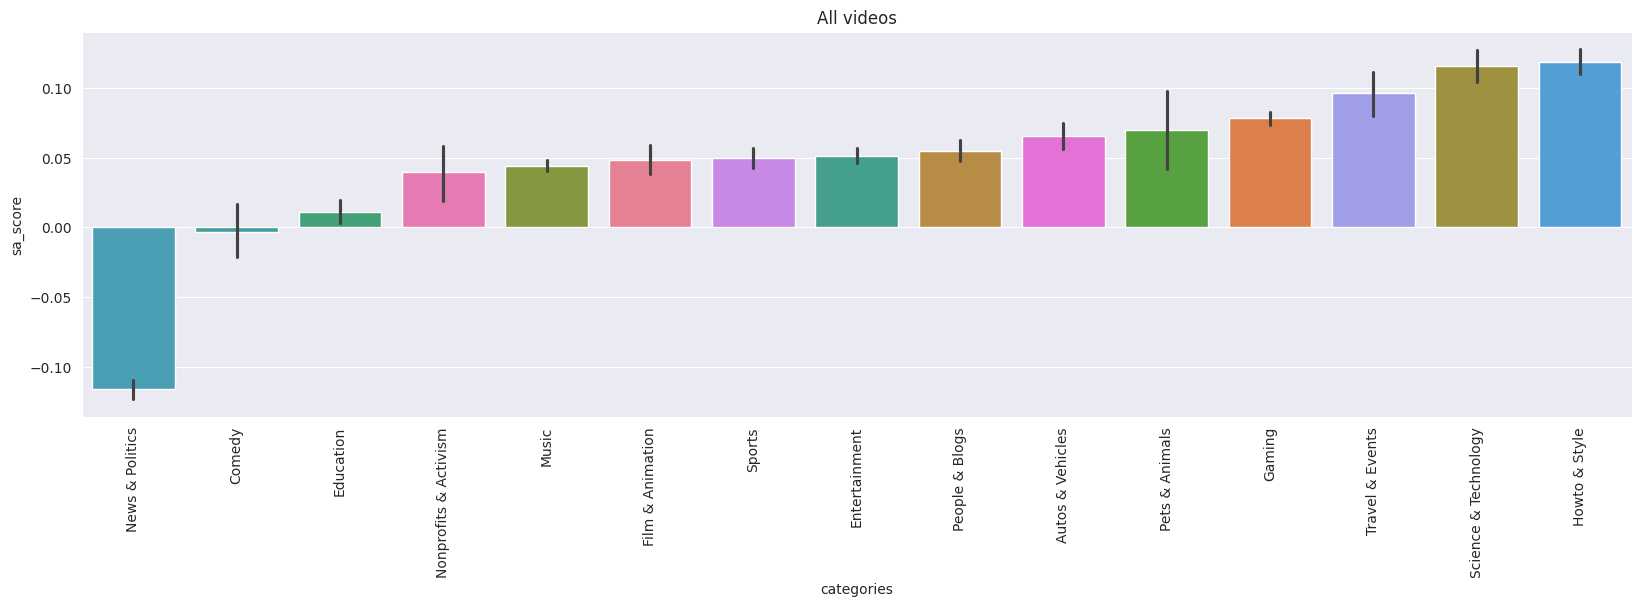

/tmp/ipykernel_78041/3189042063.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(list(ax.get_xticklabels()), rotation=90)


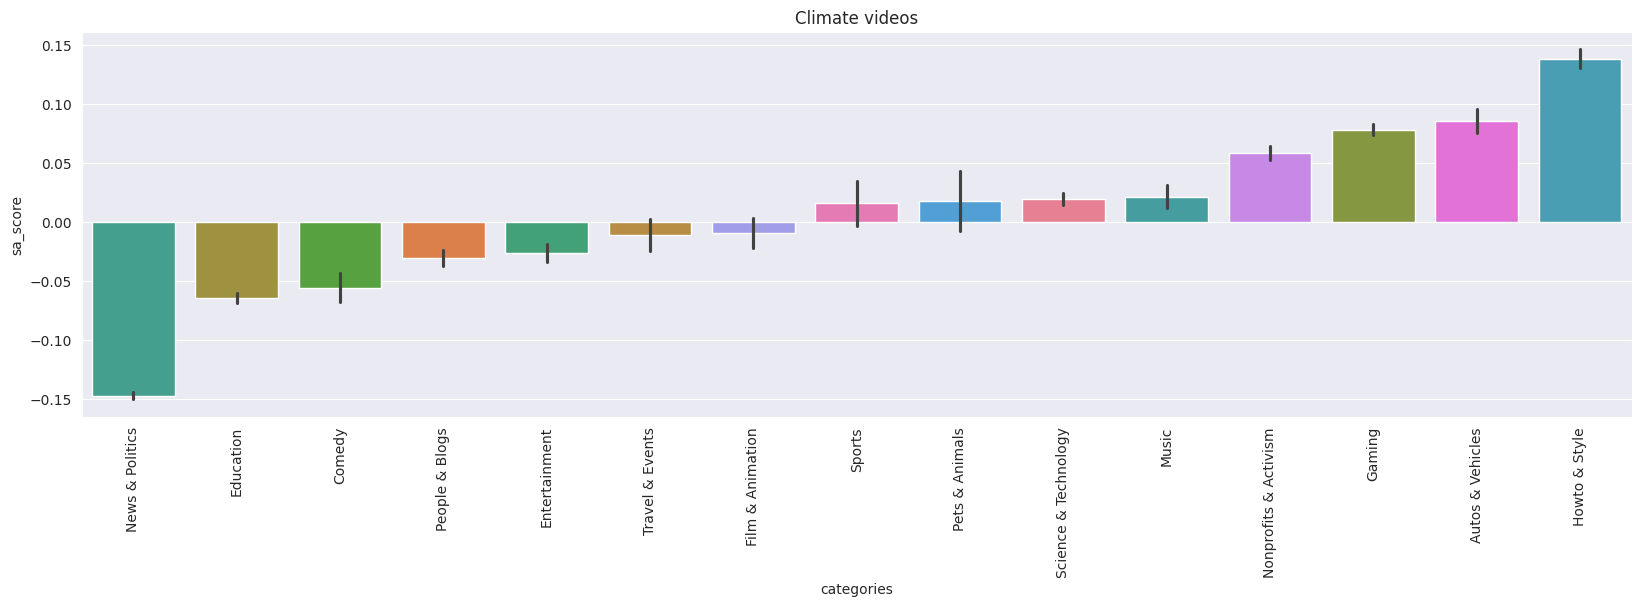

In [65]:
def plot_category_sentiment(data, title):
    fig, ax = plt.subplots(figsize=(20, 5))
    order = list(data.groupby("categories")["sa_score"].mean().sort_values().index)
    # order.remove('')
    # order = order[:4] + order[-4:]
    data_cat = data[data['categories'].isin(order)]
    sns.barplot(x="categories", y="sa_score", data=data_cat, hue="categories",legend=False, ax=ax, order=order)
    ax.set_xticklabels(list(ax.get_xticklabels()), rotation=90)
    ax.set_title(title)
    plt.show()
    
    
data_climate = data_climate[data_climate['categories'] != '']
plot_category_sentiment(data, 'All videos')
plot_category_sentiment(data_climate, 'Climate videos')

# Analysis negative sentiment

In [38]:
neg_data = data[data['sa_label'] == 'negative'].copy()
neg_data.drop(columns=['sa_label', 'sa_label_int', 'positive', 'neutral'], axis=1, inplace=True)
neg_data.rename(columns={'negative': 'sa_score'}, inplace=True)
neg_data

,display_id,categories,channel_id,crawl_date,description,dislike_count,duration,like_count,tags,title,upload_date,view_count,sa_score,sa_score,sldr,like_ratio,like_view_ratio,upload_year
21,ipx8ZWSafMA,Gaming,UCzVlJX6sXY3c-uo0_GIc__A,2019-11-01 16:50:39.866218,This is how to win in fortnite season 8 as a b...,25.0,654,219.0,"vee3rdeye,fortnite,battle royal,fortnite br,tr...",How To Win in Fortnite Season 8 as a Bad Player,2019-03-26,3956,0.570382,-0.542544,8.461538,0.897541,0.055359,2019
32,h2Aw3UVUogU,News & Politics,UCzUV5283-l5c0oKRtyenj6Q,2019-11-22 08:47:17.390160,NSA Official: Conspiracy Theorists Are Dangero...,16.0,332,595.0,"Mark Dice,illuminati,conspiracy,new world orde...",NSA Official: Conspiracy Theorists Are Dangero...,2014-04-02,17535,0.840653,-0.830877,35.058824,0.973813,0.033932,2014
59,b5sjFqoSRAI,News & Politics,UCzSXLrUVmh5KjdMhT54FtjA,2019-11-15 06:02:37.411065,Human waste’ found in Coca-Cola cans at compan...,0.0,139,5.0,"End Times,Last Days,Rapture,WW3,Strange Sounds...",Human waste’ found in Coca Cola cans at compan...,2017-03-28,403,0.702502,-0.688742,6.000000,1.000000,0.012407,2017
121,T4NCVffAMEU,Travel & Events,UCzQ9th8PRXUR8GgFzrD3tmQ,2019-11-08 20:07:48.953369,"Dear Guys,\nIn this Vlog 212 I explain to you ...",4.0,402,20.0,"mumbai market,market vlogs,jo vlog,mumbai,indi...",Why do my Market Vlogs usually get Cancelled?,2017-04-06,408,0.899021,-0.894069,4.200000,0.833333,0.049020,2017
182,9j4snBV-w4k,Gaming,UCzMjRlKVO9XIqH_crIFpi6w,2019-11-04 13:18:42.694358,baby zombie + badboyhalo = WHY\nMERCH: http://...,403.0,927,19631.0,"minecraft,mine craft,minecraft youtuber,pg,fam...",baby zombie + badboyhalo = WHY,2019-08-26,243479,0.610454,-0.580949,48.594059,0.979884,0.080627,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72452,Plkx7HidZFE,People & Blogs,UCs-brcHDxKqrOGU9cEWuCMQ,2019-11-13 02:57:34.424697,Trump is Just Like HITLER' Crazy SJW 'Refuse F...,4.0,364,115.0,"MGTOW,MGTOW Howard Dare,Feminism,Advice,Red Pi...",'Trump is Just Like HITLER' Crazy SJW 'Refuse ...,2017-02-22,1785,0.775254,-0.761557,23.200000,0.966387,0.064426,2017
72491,pBFdyUKsZkI,People & Blogs,UCrz4qZv2_b_OhRCQVc2sNIQ,2019-11-20 11:57:03.324713,D.W. acts like a baby while playing ball with ...,1.0,69,15.0,,Arthur spoof- D.W. is a smelly baby,2018-06-29,3528,0.726019,-0.702931,8.000000,0.937500,0.004252,2018
72509,6MG27B3XNvk,Entertainment,UCry87-V7BI0gIdqWHOwPHag,2019-10-31 15:25:18.160781,YT Wont Show You These Videos So I have Them H...,2.0,480,37.0,"Police,News,Police Dashcam Video,Police Dashca...",We Don't Trust Each Other Anymore And This Is ...,2017-11-26,571,0.948342,-0.945783,12.666667,0.948718,0.064799,2017
72530,5_pbZG1pqf8,News & Politics,UCry2gCVdntv6r661sKUiKXw,2019-11-01 21:01:10.698133,A water main break in the north metro flooded ...,0.0,130,4.0,"WCCO 4 News At 10,water main break,flooding,wh...",Multiple People Displaced After Water Main Bre...,2018-03-31,193,0.681049,-0.672065,5.000000,1.000000,0.020725,2018
